# Beamtime SSD Analysis
Analysis of the SSD data from the beamtime of 18-19. September 2022. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

filepath_drive = "/content/drive/.shortcut-targets-by-id/1B48ps8379Krem2Eym3IJNaUK-_pZ9Q2w/NP2012-AVF72-05"

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/data-engineering-utokyo

/content/drive/MyDrive/data-engineering-utokyo


In [9]:
import sys

from datetime import datetime
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from src.recorders.ssd_recorder import SSDRecorder
from src.recorders.file_recorder import FileRecorder
from src.analyses.ssd_analysis import SSDAnalysis, SSDAnalysisWrapper
from src.analyses.mkdir import create_folders
from src.analyses.runner import Runner

## Overview
First we have to get an overview over all the SSD files we have. 

In [4]:
ssd_folder = f"{filepath_drive}/WEDATA/data/"
match_sunday = ".*20220918.*Slot1-In2.csv$"

In [5]:
file_recorder_sunday = FileRecorder(
    filepath=ssd_folder, 
    match=match_sunday
)

In [6]:
file_recorder_sunday.get_table()

,filename,filename_with_extension,filepath,mtime,ctime,timestamp,datetime
6,-20220918-133952-Slot1-In2,-20220918-133952-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663478e+09,1.663662e+09,2022-09-20 08:19:50.000000,2022-09-20 08:19:50
14,-20220918-125158-Slot1-In2,-20220918-125158-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663475e+09,1.663662e+09,2022-09-20 08:19:50.000000,2022-09-20 08:19:50
1,-20220918-142941-Slot1-In2,-20220918-142941-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663489e+09,1.663662e+09,2022-09-20 08:19:51.000000,2022-09-20 08:19:51
0,-20220918-194707-Slot1-In2,-20220918-194707-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663499e+09,1.663662e+09,2022-09-20 08:20:51.000000,2022-09-20 08:20:51
9,-20220918-190159-Slot1-In2,-20220918-190159-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663497e+09,1.663662e+09,2022-09-20 08:22:04.000000,2022-09-20 08:22:04
5,-20220918-132501-Slot1-In2,-20220918-132501-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663475e+09,1.663662e+09,2022-09-20 08:22:30.000000,2022-09-20 08:22:30
12,-20220918-095954-Slot1-In2,-20220918-095954-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663463e+09,1.663662e+09,2022-09-20 08:23:25.000000,2022-09-20 08:23:25
11,-20220918-171204-Slot1-In2,-20220918-171204-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663494e+09,1.663662e+09,2022-09-20 08:26:17.000000,2022-09-20 08:26:17
3,-20220918-183451-Slot1-In2,-20220918-183451-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663495e+09,1.663663e+09,2022-09-20 08:31:08.000000,2022-09-20 08:31:08
2,-20220918-193544-Slot1-In2,-20220918-193544-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663498e+09,1.663663e+09,2022-09-20 08:31:41.000000,2022-09-20 08:31:41


## Analysis Sunday
During the beamtime, we created the SSDAnalysisWrapper, which can perform the SSDAnalysis for many files. We first test this wrapper. 

In [13]:
# Paths
run_name = f"SSD_Analysis_2"
plot_path = f"{filepath_drive}/plots/{run_name}/" 
result_path = f"{filepath_drive}/results/{run_name}/" 

# Create folders
create_folders(plot_path, result_path)

# Time interval
trivial_time_interval = (
        dt.datetime(2000, 1, 1, 0, 0, 0), 
        dt.datetime(2030, 1, 1, 0, 0, 0)
        )

In [14]:
ssd_analysis_wrapper = SSDAnalysisWrapper(
    folder=ssd_folder, 
    result_path=result_path, 
    plot_path=plot_path,
    image_extension=".png",
    match=match_sunday,
    time_interval=trivial_time_interval
    )

In [16]:
runner = Runner(analyses=[ssd_analysis_wrapper])
runner.run(cycles=1000, period_s=5)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
result_path_sunday = f"{filepath_drive}/results/SSD_Analysis_2/" + "ssd_analysis_results.csv"  # result_path + "ssd_analysis_results.csv"
sunday_result_df = pd.read_csv(result_path_sunday)

In [28]:
sunday_result_df

,timestamp_ns,pulses_peak,pulses_background,half_life_time,background
0,1663509240895911424,193.384763,72.615237,1.035256e+09,1.828378e-08
1,1663509522230714624,213.796693,72.203307,9.662426e+08,1.828378e-08
2,1663508493538828544,257.965035,73.034965,1.005666e+09,1.828378e-08
3,1663510029684470784,239.984399,73.015601,9.543965e+08,1.828378e-08
4,1663508878470579968,218.798266,72.201734,1.032509e+09,1.828378e-08
...,...,...,...,...,...
76,1663531810535069696,107.210510,9.789490,8.884402e+07,2.524547e-09
77,1663532278897312512,190.159347,9.840653,7.228164e+08,2.524547e-09
78,1663531419837460480,112.556297,6.443703,1.589947e+08,2.524547e-09
79,1663579521389576960,8.602679,8.397321,1.117400e+09,2.434722e-09


## Analysis Monday
We do the same for Monday to get an overview.

In [18]:
ssd_folder = f"{filepath_drive}/WEDATA/data/"
match_monday = ".*20220919.*Slot1-In2.csv$"

In [19]:
file_recorder_monday = FileRecorder(
    filepath=ssd_folder, 
    match=match_monday
)

In [20]:
file_recorder_monday.get_table()

,filename,filename_with_extension,filepath,mtime,ctime,timestamp,datetime
54,-20220919-093309-Slot1-In2,-20220919-093309-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663555e+09,1.663662e+09,2022-09-20 08:19:53.000000,2022-09-20 08:19:53
16,-20220919-121910-Slot1-In2,-20220919-121910-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663560e+09,1.663662e+09,2022-09-20 08:19:55.000000,2022-09-20 08:19:55
29,-20220919-133114-Slot1-In2,-20220919-133114-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663562e+09,1.663662e+09,2022-09-20 08:20:07.000000,2022-09-20 08:20:07
14,-20220919-133802-Slot1-In2,-20220919-133802-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663563e+09,1.663662e+09,2022-09-20 08:20:11.000000,2022-09-20 08:20:11
38,-20220919-134935-Slot1-In2,-20220919-134935-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663563e+09,1.663662e+09,2022-09-20 08:20:19.000000,2022-09-20 08:20:19
...,...,...,...,...,...,...,...
39,-20220919-145759-Slot1-In2,-20220919-145759-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663568e+09,1.663663e+09,2022-09-20 08:34:57.000000,2022-09-20 08:34:57
34,-20220919-113158-Slot1-In2,-20220919-113158-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663556e+09,1.663663e+09,2022-09-20 08:35:15.000000,2022-09-20 08:35:15
3,-20220919-152734-Slot1-In2,-20220919-152734-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663569e+09,1.663663e+09,2022-09-20 08:35:15.000000,2022-09-20 08:35:15
47,-20220919-140611-Slot1-In2,-20220919-140611-Slot1-In2.csv,/content/drive/.shortcut-targets-by-id/1B48ps8...,1.663564e+09,1.663663e+09,2022-09-20 08:35:17.000000,2022-09-20 08:35:17


In [22]:
# Paths
run_name = f"SSD_Analysis_Monday_1"
plot_path = f"{filepath_drive}/plots/{run_name}/" 
result_path = f"{filepath_drive}/results/{run_name}/" 

# Create folders
create_folders(plot_path, result_path)

# Time interval -> not used because uploading the file to Google Drive destroys the timestamp
trivial_time_interval = (
        dt.datetime(2000, 1, 1, 0, 0, 0), 
        dt.datetime(2030, 1, 1, 0, 0, 0)
        )

In [23]:
ssd_analysis_wrapper_monday = SSDAnalysisWrapper(
    folder=ssd_folder, 
    result_path=result_path, 
    plot_path=plot_path,
    image_extension=".png",
    match=match_monday,
    time_interval=trivial_time_interval
    )

In [24]:
runner = Runner(analyses=[ssd_analysis_wrapper_monday])
runner.run(cycles=10000, period_s=5)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
result_path_monday = result_path + "ssd_analysis_results.csv"  
monday_result_df = pd.read_csv(result_path_monday)

In [30]:
monday_result_df

,timestamp_ns,pulses_peak,pulses_background,half_life_time,background
0,1663580038357520896,10.442398,8.557602,4.568969e+08,2.254743e-09
1,1663582358706908160,6.202677,6.797323,1.287071e+09,2.254743e-09
2,1663582411053388032,11.901536,8.098464,9.368689e+08,2.254743e-09
3,1663582594001465600,7.847143,7.152857,9.907973e+08,2.254743e-09
4,1663583365004739072,7.378473,6.621527,8.660825e+08,2.254743e-09
...,...,...,...,...,...
197,1663601528370454528,2727.494792,1605.505208,1.026408e+09,4.017148e-07
198,1663596487796127744,13312.988355,2711.011645,1.034889e+09,6.788764e-07
199,1663596509424569344,12352.727803,4634.272197,1.033832e+09,1.158742e-06
200,1663593988957297664,2033.687909,637.312091,7.560306e+08,1.652911e-07


In [35]:
x = monday_result_df["timestamp_ns"]
y = monday_result_df["pulses_peak"]
background =  monday_result_df["background"]

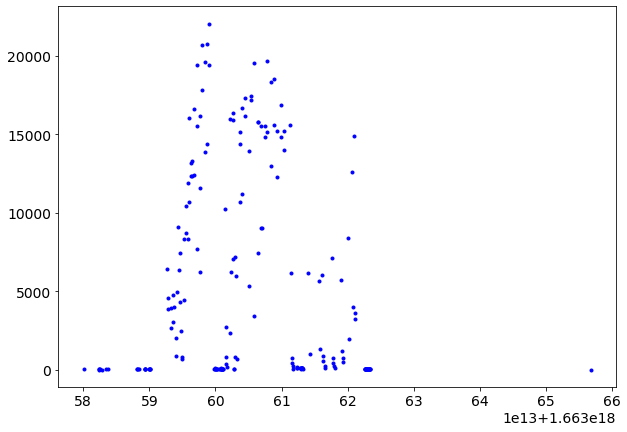

In [34]:
plt.plot(x, y, "b.")

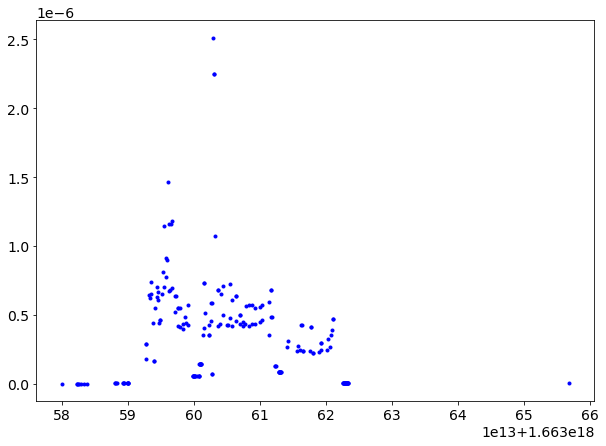

In [37]:
plt.plot(x, background, "b.")

In [38]:
!git status

On branch online
Your branch is up to date with 'origin/online'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   src/notebooks/beamtime_analysis.ipynb
	modified:   src/notebooks/laser_room_analysis.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	src/notebooks/beamtime_ssd_analysis.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
